In [1]:
import matplotlib.pyplot as plt
import numpy
import seaborn
import zarr

In [175]:
zarr_path = '/data/gent/vo/000/gvo00070/vsc42015/datasets/weizmann/EhV/v2/images/Ctrl_T0_R2_27.zarr'
zarr_idx = 468
z = zarr.open(zarr_path)

In [176]:
pixels = z[zarr_idx].reshape(z.attrs["shape"][zarr_idx])

In [177]:
pixels = numpy.clip(pixels, a_min=0, a_max=4096)
# pixels = img_as_float32(pixels)

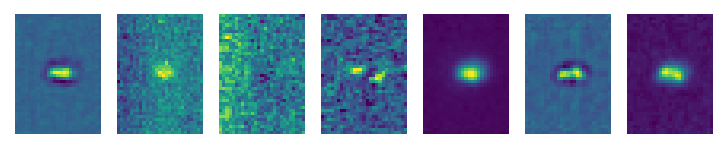

In [178]:
fig, axes = plt.subplots(1, len(pixels), dpi=150, squeeze=False)
axes = axes.ravel()
for p, ax in zip(pixels, axes):
    ax.imshow(p)
    ax.set_axis_off()

In [179]:
from scip.segmentation import threshold, util
from scipy.stats import normaltest
from skimage.filters import gaussian

In [180]:
from importlib import reload
reload(threshold)

<module 'scip.segmentation.threshold' from '/vsc-mounts/gent-user/420/vsc42015/projects/dask-pipeline/src/scip/segmentation/threshold.py'>

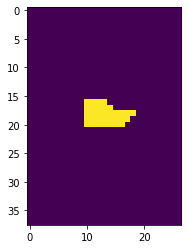

In [182]:
m = threshold.get_mask(dict(pixels=pixels), main=True, main_channel=0)
m = util.get_bounding_box(m, bbox_channel=0)
m = threshold.get_mask(m, main=False, main_channel=0)
plt.imshow(m["mask"][3])

In [173]:
bbox = m["bbox"]
x = m["pixels"][1, bbox[0]:bbox[2], bbox[1]:bbox[3]]
x = gaussian(x, sigma=1)
normaltest(x.ravel()).pvalue > 0.05

True

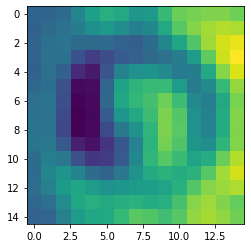

In [174]:
plt.imshow(x)